In [2]:
# import packages
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# parameters
input_size = 784 # img_size = (28,28) ---> 28*28=784 in total
hidden_size = 500 # number of nodes at hidden layer
num_classes = 10 # number of output classes discrete range [0,9]
num_epochs = 20 # number of times which the entire dataset is passed throughout the model
batch_size = 100 # the size of input data took for one iteration
lr = 1e-3 # size of step 

In [4]:
# data
train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor(), download = True)

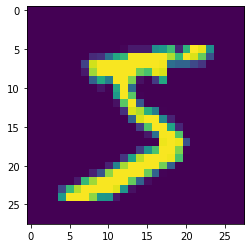

In [5]:
# example image
image, label = train_data[0]
plt.imshow(image.reshape((28, 28)))

In [6]:
# data loader
train_gen = torch.utils.data.DataLoader(dataset = train_data,
                                             batch_size = batch_size,
                                             shuffle = True)

test_gen = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = batch_size, 
                                      shuffle = False)

In [7]:
# instantiate nn
class Net(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size) # first linear layer
    self.relu = nn.ReLU() # relu enhancement
    self.fc2 = nn.Linear(hidden_size, num_classes) # second linear layer
  
  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [8]:
net = Net(input_size, hidden_size, num_classes)

In [9]:
# loss and optimization
loss_function = nn.CrossEntropyLoss() # loss function
optimizer = torch.optim.Adam( net.parameters(), lr=lr) # optimizer

In [14]:
# make output df
train_out = pd.DataFrame(columns = ['epoch', 'loss'])

# train network
for epoch in range(num_epochs):
  for i ,(images,labels) in enumerate(train_gen):
    images = Variable(images.view(-1,28*28)).cpu()
    labels = Variable(labels).cpu()
    
    optimizer.zero_grad() # zero out gradients
    outputs = net(images) # run network on images
    
    loss = loss_function(outputs, labels) # calculate loss
    loss.backward() # pass loss backward
    optimizer.step() # run optimizer
    
    if (i+1) % 100 == 0:
        """
      print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_data)//batch_size, loss.data))
        """
        train_out = pd.concat([train_out,
                               pd.DataFrame({'epoch' : str(epoch+1), 'loss' : str(loss.data)}, index = [0])],
                              ignore_index = True)

# write to csv
train_out.to_csv('output/train_out.csv', index = False)

In [16]:
correct = 0
total = 0
for images,labels in test_gen:
  images = Variable(images.view(-1,28*28)).cpu()
  labels = labels.cpu()
  
  output = net(images)
  _, predicted = torch.max(output,1)
  correct += (predicted == labels).sum()
  total += labels.size(0)

print('Accuracy of the model: %.3f %%' %((100*correct)/(total+1)))

Accuracy of the model: 98.380 %


In [41]:
print(predicted)
print(labels)

tensor([8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 7, 8, 6, 4, 1,
        9, 3, 8, 4, 4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 6, 5, 3, 3, 8, 9, 1, 4,
        0, 6, 1, 0, 0, 6, 2, 1, 1, 7, 7, 8, 4, 6, 0, 7, 0, 3, 6, 8, 7, 1, 5, 2,
        4, 9, 4, 3, 6, 4, 1, 7, 2, 6, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
        3, 4, 5, 6])
tensor([8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 7, 8, 6, 4, 1,
        9, 3, 8, 4, 4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 6, 5, 3, 3, 3, 9, 1, 4,
        0, 6, 1, 0, 0, 6, 2, 1, 1, 7, 7, 8, 4, 6, 0, 7, 0, 3, 6, 8, 7, 1, 5, 2,
        4, 9, 4, 3, 6, 4, 1, 7, 2, 6, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
        3, 4, 5, 6])


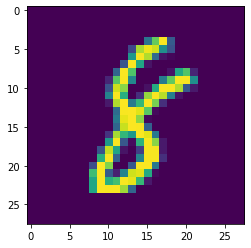

In [43]:
plt.imshow(images[0].reshape((28, 28)))